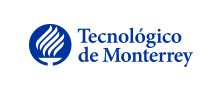

<h1><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h1>

<h3><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Second Partial Evaluation</center></h3>
    
<h3><center>Date: November 2, 2021</center></h3>

---

<h3>Grade: </h3>

---
<h4><center>Student's information</center></h4>
<h4>Name: </h4><br>
<p> Monica Lara Pineda  <br>
 Manuel Ortiz Hernández <br> 
 Omar Alejandro Robledo Rodríguez <br> 
 Diego Ramírez Levy <br> 
 Raúl González Cardona </p>
<h4>Student ID: </h4>
 <p>A01655306 <br>
 A01655515 <br>
 A01338010 <br>
 A01367771 <br> 
 A01654995</p>

$$Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este examen esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este examen de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.$$

# Examen Parcial 2 - Aprendizaje Máquina

---

Inidicaciones: El examen consta de ejercicios prácticos, los cuales se abordan lo visto en los temas 3 y 4.

Se evalua el desarrollo adecuado de la metodología para el ajuste de los datos, el modelo y la precisión del mismo.

* Fecha de liberación del examen: Viernes 22 de octubre.

* Fecha límite de entrega: Martes 2 de noviembre hasta las 23:59 hrs

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.

En caso de no tener la información aquí solicitada, no se evaluará el examen.

---
# Sección 1

### Ingeniería de Características

---

Tomando como referencia la información en la notebook <font color=red>"Feature_Engineering"</font>, deberán utilizar los archivos de <font color=blue>"train.csv"</font> y <font color=green>"test.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento, que es la ingeniería de características, donde a partir del análisis estadístico preliminar, podríamos sustituir, ajustar, imputar datos o crear nuevas variables con fines prácticos.

----

Idea: Aplicar su propio pipeline para replicar o mejorar los resultados de predicción de los diversos algoritmos puestos en dicha notebook. Pueden enfocarse solamente en los primeros 5 algoritmos que tuvieron un desempeño mayor al 79% en este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron, así como el porqué es conveniente (o no) aplicar validación cruzada (CV) y gridsearch.

In [1]:
# Importación de las librerías para el manejo de datos.
import pandas as pd
import numpy as np
import random as rnd

# Importación de las librerías para la visualización.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importación de modelos machine learning.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier

### Adquisión de datos:

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

# Clasificación
###### Es posible que queramos clasificar o categorizar nuestras muestras. También es posible que deseemos comprender las implicaciones o la correlación de diferentes clases con nuestro objetivo de solución.

### Análisis describiendo los datos:

* ¿Qué características están disponibles en el conjunto de datos?
 - Id del pasajero, sobrevivió o no, clase, nombre del pasajero, sexo del pasajero, edad del pasajero, sibsp,  parch, ticket, tarifa, cabina y embarque.
      
* ¿Qué variables son categóricas?
 - Survived, Pclass, Sex, SibSp, Embarked.
 
* ¿Hay variables numéricas?
 - Sí hay; PassengerId, Age, Fare.
 
* ¿Qué variables tienen tipos de datos mezclados? (numérico, alfanumérico, etc...)
 - Ticket y Cabin.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Correlación
###### Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado.

### Análisis mediante pivoteo de clases:

In [6]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


##### De aquí podemos observar que los pivoteos se hacen siempre con base en la relación que tienen las clases con las personas que sobrevivieron:
- En Pclass observamos que la supervivencia aumenta o decrece dependiendo de la clase en la que viajan, entre más alta sea la clase, mayor la supervivencia.
- En Sex observamos que la supervivencia en hombres fue mucho menor que la supervivencia en mujeres.
- Por último en SibSp y Parch, no podemos observar en sí una tendencia clara y podemos concluir que esos pivoteos no nos aportan información relevante.

### Análisis Visual de los datos:

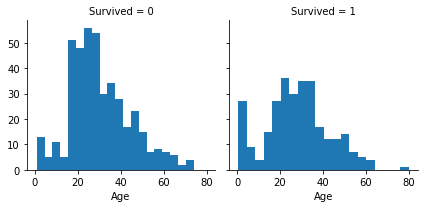

In [10]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

##### Aquí podemos visualizar la relación que existe entre edad y supervivencia, en donde vemos que las personas que más sobrevivieron están entre los 20 y 40 años de edad, así mismo observamos que el índice de supervivencia empieza a decrementar a partir de los 40 años de edad.

# Corrección
###### También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o posiblemente valores inexactos dentro de las características e intentar correngir estos valores o excluir las muestras que contienen los errores. Una forma de hacer esto es detectar cualquier valor atípico entre nuestras muestras o características. También podemos descartar por completo una característica si no contribuye al análisis o puede sesgar significativamente los resultados.

In [11]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


# Creando
###### ¿Podemos crear nuevas características basadas en una característica existente o un conjunto de características, de modo que la nueva característica siga los objetivos de correlación, conversión e integridad?

In [12]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


 -- Se creó una categorización con base en los titulos que contiene cada nombre.

In [13]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


-- Se cambió a los titulos por uno estándar.

### Categorización del DataSet:

In [14]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Eliminación columna PassengerId y Name:

In [15]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


-- Eliminamos la variable nombre ya que está no nos aporta información de importancia, solo nos quedamos con los titulos, así mismo nos deshacemos de la columna de PassengerId.

### Conversión de la variable Sex:

In [17]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


-- Esta conversión de la variable Sex la realizamos para tener un mejor manejo en los modelos de ML, así podemos asegurar que female tendrá el valor de 1 y male el valor de 0.

### Categorización de intervalos en Age:

In [19]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

### Iteración sobre Sex y Pclass:

In [20]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


-- La iteración se realiza para calcular los valores de Age para las seis combinaciones.

In [22]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


-- Se crean los intervalos de edad con el fin de determinar la correlación con Survived.

### Estandarización de los intervalos de Age:

In [23]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


### Eliminación de la columna AgeBand:

In [24]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Creación de la columna FamilySize:

In [25]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


-- La variable FamilySize se crea para poder combinar Parch y SibSp.

* Se crea la columna IsAlone para el caso en que el pasajero iba solo y no entra ni en SibSp ni en Parch:

In [26]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Eliminación columnas SibSp, Parch y FamilySize:

In [27]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Combinación columnas Pclass y Age:

In [28]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# Completando
###### La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una característica. Los algoritmos pueden funcionar mejor cuando no faltan valores.

In [29]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [30]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Conversión variables categóricas a numéricas:

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


- Completamos la variable Fare para sus valores faltantes, usando el valor que ocurre con mayor frecuencia.

In [32]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


- Creeamos un intervalo para esta misma variable.

In [33]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


* Realizamos una estandarización de los valores (0, 1, 2, 3).

In [34]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [35]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [36]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# DataSet Listo
###### Después de haber realizado todos los pasos anteriores, nuestro dataset ya está listo para poder aplicar los modelos de Machine Learning que nos piden en la sección 1, los cuales son CV y GridSearch.

-- Variables independientes:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

X = train_df.drop(train_df.columns[0], axis=1)
Y = train_df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

-- Importamos liberías para la creación de los pipelines para nuestros modelos y para la normalización de nuestros datos:

* Creación de pipelines para los top 5 modelos de ML:

In [38]:
dt_pl = make_pipeline(RobustScaler(), DecisionTreeClassifier())
rf_pl = make_pipeline(RobustScaler(), RandomForestClassifier(n_estimators=10, max_depth=3, random_state=10))
lr_pl = make_pipeline(RobustScaler(), LogisticRegression(solver='liblinear'))
nb_pl = make_pipeline(RobustScaler(), KNeighborsClassifier())
svc_pl = make_pipeline(RobustScaler(), SVC())

# CrossValidation(CV):

* Decision Tree:

In [39]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    dt_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, dt_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, dt_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [40]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.866573,0.810056
1,0.877980,0.775281
2,0.872370,0.831461
3,0.861150,0.859551
4,0.880785,0.758427


* Random Forest:

In [41]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    rf_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, rf_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, rf_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [42]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.799157,0.798883
1,0.800842,0.730337
2,0.791024,0.814607
3,0.785414,0.820225
4,0.800842,0.792135


* Logistic Regression:

In [43]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    lr_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, lr_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, lr_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [44]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.808989,0.826816
1,0.807854,0.769663
2,0.809257,0.808989
3,0.788219,0.814607
4,0.806452,0.792135


* KNeighbors:

In [45]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    nb_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, nb_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, nb_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [46]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.834270,0.804469
1,0.861150,0.775281
2,0.837307,0.786517
3,0.824684,0.853933
4,0.856942,0.786517


* SCV:

In [47]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    svc_pl.fit(X_train, Y_train)
    df = {'Train_Accuracy':accuracy_score(Y_train, svc_pl.predict(X_train)), 
          'Test_Accuracy':accuracy_score(Y_test, svc_pl.predict(X_test))}
    accuracy_df = accuracy_df.append(df, ignore_index = True)

In [48]:
accuracy_df

,Train_Accuracy,Test_Accuracy
0,0.785112,0.787709
1,0.788219,0.764045
2,0.784011,0.780899
3,0.771388,0.825843
4,0.792426,0.741573


# GridSearch:

* Decision Tree:

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('classifier', DecisionTreeClassifier())])
params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6317412507171543
Accuracy Score on test data set: 0.8834080717488789


* Random Forest:

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('classifier', RandomForestClassifier(n_estimators=8))])
params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6317412507171543
Accuracy Score on test data set: 0.8834080717488789


* Logistic Regression:

In [68]:
pipeline = make_pipeline(RobustScaler(), SelectKBest(f_classif), LogisticRegression(solver='lbfgs'))

param_grid = {'selectkbest__k': [i+1 for i in range(8)], 'logisticregression__class_weight': [None,'balanced'], 'logisticregression__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0], 'logisticregression__solver': ['lbfgs', 'liblinear']}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=100)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Cross Validation Score: 0.8083492312871732
Accuracy Score on test data set: 0.8834080717488789


* KNeighbors:

In [69]:
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()
pipeline = Pipeline(steps=[('knn', knn)])
params = {'knn__n_neighbors': [2,5,15, 30, 45, 64]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=10, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
Y_pred = gridsearch.predict(X_test)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Cross Validation Score: 0.8157847127996382
Accuracy Score on test data set: 0.8834080717488789


* SCV:

In [72]:
pipeline = make_pipeline(RobustScaler(), SelectKBest(f_classif), SVC(C=0.1))
params = {'selectkbest__k': [i+1 for i in range(8)], 'svc__class_weight': [None,'balanced'], 'svc__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
gridsearch.fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=100)

test_score = accuracy_score(Y_test, dt_pl.predict(X_test))

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Cross Validation Score: 0.8263382336438111
Accuracy Score on test data set: 0.8834080717488789


# Conclusión:
### Después de realizar el preprocesamiento de los datos y de la implementación de Cross Validation (CV) y de GridSearch, creemos que el modelo de Cross Validation con KFolds y en específico apoyado de Decision Tree, es el mejor modelo a implementar, ya que su accuracy se toma con base en "dobleces" aleatorios, tomando por cada doblez los diferentes atributos o columnas de nuestro dataframe de Titanic (una vez que este quedó totalmente limpio y completo), con esto finalmente obtuvimos un accuracy de 80% promedio.
### Así mismo en cuanto a la precisión de los diferentes modelos, encontramos una correlación con nuestro accuracy general que como mencionamos rondó entre un 80% promedio.

---
--- 

# Sección 2

### Recomendaciones usando técnicas de ML (Web Scrapping, Supervised, Unsupervised)

---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de <font color=blue>"anime.csv"</font> y <font color=green>"rating.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento. Posteriormente, la aplicación del análisis de componentes principales (PCA), k-means y la descripción de las recomendaciones para al menos 3 clusters generados.

Aplicar la técnica de webscrapping y explicar su funcionamiento (**puede tardar desde 10 minutos hasta 1 hora aproximadamente; dependiendo la cantidad de registros que hayan usado**). Tomen en cuenta que esta búsqueda va acorde a los ids del conjunto de datos que les hace falta información y, a partir de esta técnica de minería de datos, completamos los registros faltantes.

Posteriormente, entrenar el algoritmo de k-NN para obtener las distancias de cada id del conjunto de datos, para obtener los indices y distancias correspondientes que nos servirán para proporcionar recomendaciones con respecto a estos resultados.

----

Idea: Aplicar su propio pipeline para replicar los resultados de predicción/recomendación de este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron.

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [1]:
#Aquí sus códigos (añadan las líneas necesarias)

---
---

# Sección 3

### Aplicación de modelos de DL
---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de las imágenes en <font color=blue>"dataset"</font>, de los apartados <font color=magenta>covid y normal</font> (**podrían tratar de añadir más imágenes a cada tipo para mejorar los resultados**) y, finalmente, probar el modelo con imágenes del set de datos en la carpeta <font color=green>"test"</font> como punto de referencia.

Aplicaremos la red VGG16 (pero podrían ver la posibilidad de tratar de aplicar otro modelo de los que se encuentran en **tensorflow.keras.applications**).

Pueden tratar de jugar con la estructura definida en *"base model"*, siempre y cuando hayan visto el link que viene al final de ese apartado de dicha red VGG16.

-----
Podemos jugar un poco con la información de las inicialiaciones de las variables **INIT_LR, EPOCS, BS** para observar si hay o no mejoría en los resultados de entrenamiento.

Aplicar la técnica de DL y explicar su funcionamiento (**puede tardar desde 5 hasta 30 minutos aproximadamente; 5 minutos con los datos proporcionados, más tiempo en caso de añadir nuevas imágenes**).

----

En cada apartado, traten de explicar el proceso que se está llevando a cabo.

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
!pip install imutils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


### Definición de las variables: INIT_LR, EPOCS, BS

La tasa de aprendizaje (learning rate) es un hiperparámetro que controla cuánto cambiar el modelo en respuesta al error estimado cada vez que se actualizan los pesos del modelo.
<br>
INIT_LR = <i>3e-3</i>
<br>
<br>
Las <i>epochs</i> indican el número de recorridas de todo el conjunto de datos de entrenamiento que ha completado el algoritmo de aprendizaje automático.
<br>
EPOCHS = <i>40</i>
<br>
<br>
El batch size se refiere al número de ejemplos de entrenamiento utilizados en una iteración.
<br>
BS = <i>9</i>

In [100]:
INIT_LR = 3e-3
EPOCHS = 40
BS = 9

### Definición del dataset junto a los datos y etiquetas que utilizaremos para nuestro modelo

In [101]:
imagePaths = list(paths.list_images('dataset/'))

In [102]:
data, labels = ([],[]) #X,y

Al obtener el path hacia el directorio del dataset, vamos a recorrer los directorios de las imágenes.
Se cambiaran los canales de color, haciendo que pasen de BGR a RGB, tal es una de las funciones de nuestra librería <i><b>cv2</i></b>. Posterioremente, es necesario cambiar su tamaño, ajustándolo a 224 x 224 px. 
<br>
<br>
Finalemente, en nuestras listas de datos y etiquetass, agregaremos, respectivamente, el correspondiente valor a cada lista. Siendo <i>label</i> el nombre del archivo y para la lista data agregamos <i>image</i> la cual hemos reajustado de acuerdo a nuestra conveniencia.

In [103]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

### Definición de nuestras imágenes de prueba

In [104]:
miniTest = list(paths.list_images("test/"))

In [105]:
test1, test2 = ([],[])

El proceso es el mismo al anterior, donde modificaremos datos de la imagen, almacenamos su la etiqueta y finalemente estos dos se agregan a las listas, en el cual en este escenario son de pruebas.

In [106]:
for imageP in miniTest:
    lbl = imageP.split(os.path.sep)[-1]
    img = cv2.imread(imageP)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    test1.append(img)
    test2.append(lbl)

### Manejo de nuestra info obtenida

Se convertirán nuestras listas de data y etiquetas a arrays de NumPy en el rango de px de [0,255]

#### De nuestras listas obtenidas del dataset

In [107]:
data = np.array(data) / 255.0
labels = np.array(labels)

#### De nuestras listas obtenidas de test

In [108]:
test1 = np.array(test1) / 255.0
test2 = np.array(test2)

---
Para las etiquetas, realizaremos una binarización de una manera uno vs todos. Esto con la función de <i><b>LabelBinarizer</i></b>. Esto consiste simplemente en aprender un regresor o clasificador binario por clase. Al hacerlo, es necesario convertir etiquetas de varias clases en etiquetas binarias (pertenecen o no pertenecen a la clase). LabelBinarizer facilita este proceso con el método de transformación.

#### De nuestras etiquetas obtenidas del dataset

In [109]:
lbs = LabelBinarizer()
labels = lbs.fit_transform(labels)
labels = to_categorical(labels)

#### De nuestras etiquetas obtenidas de test

In [110]:
lbs2 = LabelBinarizer()
test2 = lbs2.fit_transform(test2)
test2 = to_categorical(test2)

### Split de datos

Split de datos 80/20-
<br>
<br>
Semilla inicial desde 42
<br>
<br>

In [111]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

### Datos de imágenes
<br>
Generación de lotes de datos de imágenes de tensores con aumento de datos en tiempo real.

In [112]:
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

### Declaración de nuestro modelo base
<br>
Utilizaremos el modelo VGG16 el cual en lugar de tener una gran cantidad de hiperparámetros, se centraron en tener capas de convolución de filtro 3x3 con un paso 1 y siempre usaron el mismo relleno y la misma capa maxpool del filtro 2x2 del paso 2.

In [113]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

### Creación de la cabeza de nuestro modelo base

In [114]:
headModel = baseModel.output

#### Reducción de la muestra de entrada de datos

Con <i><b>AveragePooling2D</i></b> reducimos la muestra de la entrada a lo largo de sus dimensiones espaciales (alto y ancho) tomando el valor promedio sobre una ventana de entrada (de tamaño definido por pool_size = 4,4) para cada canal de la entrada. La ventana se desplaza por pasos a lo largo de cada dimensión.
Teniendo una respuesta de:
<br>
<i>shape=(None, 1, 1, 512)</i>

In [115]:
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)

#### Manejo de la reducción de datos
<br>
Con <i><b>Flatten</i></b> buscaremos aplanar la entrada de datos previa.
Teniendo una respuesta de:
<br>
shape=(None, 512)

In [116]:
headModel = Flatten(name="flatten")(headModel)

#### Utilización de la capa
Con <i><b>Dense</i></b> alimentamos todas las salidas de la capa anterior a todas sus neuronas, y cada neurona proporciona una salida a la siguiente capa. Con la función de Rectified Linear Unit (relu) activaremos dicha capa.
Teniendo una respuesta de:
<br>
shape=(None, 1, 1, 64)

In [117]:
headModel = Dense(64, activation="relu")(headModel)

#### Capa para evitar que cada neurona no se apague
<i><b>Dropout</i></b> establece aleatoriamente las unidades de entrada en 0 con una frecuencia de velocidad en cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste. Las entradas que no se establecen en 0 se escalan en 1 / (1 - tasa) de modo que la suma de todas las entradas no cambia.
En nuestro caso, la tasa será de 0.5. Esto mejorará la precisión del modelo.

In [118]:
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

### Compilación del modelo

In [119]:
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [120]:
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/40


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


4/4 [==============================] - 11s 3s/step - loss: 0.8764 - accuracy: 0.4516 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 2/40
4/4 [==============================] - 9s 2s/step - loss: 0.8221 - accuracy: 0.3871 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 3/40
4/4 [==============================] - 9s 2s/step - loss: 0.6271 - accuracy: 0.6129 - val_loss: 0.6613 - val_accuracy: 0.5000
Epoch 4/40
4/4 [==============================] - 9s 3s/step - loss: 0.7239 - accuracy: 0.5484 - val_loss: 0.6401 - val_accuracy: 0.5000
Epoch 5/40
4/4 [==============================] - 11s 3s/step - loss: 0.6718 - accuracy: 0.5833 - val_loss: 0.6343 - val_accuracy: 0.5000
Epoch 6/40
4/4 [==============================] - 10s 2s/step - loss: 0.6206 - accuracy: 0.6129 - val_loss: 0.6007 - val_accuracy: 0.9000
Epoch 7/40
4/4 [==============================] - 10s 2s/step - loss: 0.5675 - accuracy: 0.7742 - val_loss: 0.5795 - val_accuracy: 0.9000
Epoch 8/40
4/4 [==============================] 

### Poner a prueba el modelo

In [121]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lbs.classes_))

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00         5
      normal       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[5 0]
 [0 5]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


Con respecto a los casos de prueba, podemos encontrar que nuestro modelo funciona a la perfección. Eso habla bien del desarrollo de todo el modelo.

### Graficar la pérdida y exactitud del modelo

[INFO] saving COVID-19 detector model...


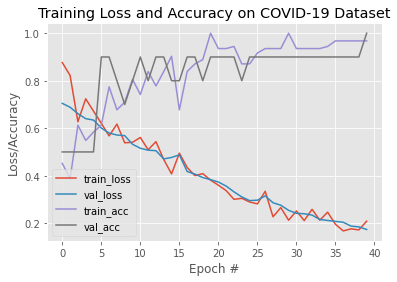

In [122]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("results.png")

print("[INFO] saving COVID-19 detector model...")
model.save("testing.model", save_format="h5")

### Poner a prueba con tests

In [123]:
print("[INFO] evaluating network...")
predIdxs = model.predict(test1, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test2.argmax(axis=1), predIdxs, target_names=lbs2.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    test.jpg       0.50      1.00      0.67         1
   test2.jpg       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Encontramos mucha menos precisión.

In [124]:
cm = confusion_matrix(test2.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[1 0]
 [1 0]]
acc: 0.5000
sensitivity: 1.0000
specificity: 0.0000
